## CNN

1. Image classification 
2. Two different activities : convolution and pooling

3. Filters are used 
It is a parameter that we can change and its purpose is to recognize certain things that are meant to be recognized 

Filter size : Magnifying glass example - one letter one filter , 26 letters 26 filters likewise 

4. 3D any image set is divided - no of rows , no of columns , no of channels ( RGB 3 channels , BW 1 chnanel) -- (dimension ( 64 * 64 * 3) for RGB)
https://poloclub.github.io/cnn-explainer/ -- (dimension (64  *64 * 1) for B&W)
(height *width * channel)

5. A filter is a matrix ( 3 * 3 with 0.5 in every cell) that has some values to find the image is combination of pixel with some data (0.1 to 0.9)
SO the filer when put on the pixel matrix 
0.1 * 0.5--0.2 * 0.5--0.3 * 0.5 such 3 * 3 matrix ---> Pair wise multiplication
We total the value and put in in first pixel place 

6. IF pixel 5*5 and filter is 3 * 3 then output is 3*3 matrix 
If 64 * 64 and filter is 3 * 3 then output is (64-2) 62 * 62 matrix 
Always reduced by (Filter-1 )

7. In max pooling if filter 2 * 2 then 60 * 60 then output will be 30*30 matrix. In pooling not slide but jumping 

8. Initial level no max pool because we need to filter specific characteristic and that is done by convolution only.

9. At the ouput the error is sent back just like Multi layer perceptron , but in MLP there was weight adjustment here changes will be in filter content 

10. Layers : I/p -> Conv layer-> Pool layer-> Flatter layer-> Dense Layer->O/p

11. Kernel and Filter is same 
Filter -> numbers
Kernal- Filter size

12. Types of pooling --> max ,average --- usually max preferred 
pooling size decides reduction in output matrix 

13. In 61 * 61 -- conv---59 * 59---pool---29 * 29---data lost 

14. Middle ones are taken care 2 time but corner once exposed only one time---> we do padding and additional layer is added 5 * 5 can become 7 * 7

15. Stride is steps 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [ ]:
## Accessing Dataset

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(X_train,y_train),(X_test,y_test)=load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

## Visualisation

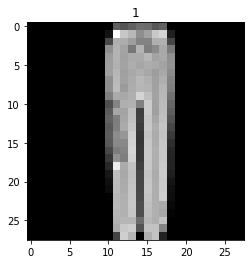

In [ ]:
plt.imshow(X_train[1000],'gray')
plt.title(y_train[1000]);

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## Normalisation layer

In [ ]:
normaliser=tf.keras.layers.Normalization()
normaliser.adapt(X_train)
normaliser.adapt(X_test)

X_train=normaliser(X_train)
X_test=normaliser(X_test)

In [ ]:
X_train[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[-1.66705310e-01, -2.37610102e-01, -2.88022250e-01,
        -3.77576619e-01, -5.25583744e-01, -6.52512431e-01,
        -7.35818923e-01, -8.08604360e-01, -9.32654202e-01,
        -1.10508120e+00, -1.26358020e+00, -1.33893907e+00,
        -1.35849750e+00, -1.31519282e+00, -1.28405118e+00,
        -1.40120041e+00, -1.45473456e+00, -1.42187226e+00,
        -1.31178093e+00, -1.12539494e+00, -9.59526122e-01,
        -8.73693526e-01, -8.07175994e-01, -7.09105551e-01,
        -5.77009022e-01, -4.72885549e-01, -3.83872122e-01,
        -2.41619453e-01],
       [-1.66705310e-01, -2.37610102e-01, -2.88022250e-01,
        -3.77576619e-01, -5.25583744e-01, -6.52512431e-01,
        -7.35818923e-01, -8.08604360e-01, -9.32654202e-01,
        -1.10508120e+00, -1.26358020e+00, -1.33893907e+00,
        -1.35849750e+00, -1.31519282e+00, -1.28405118e+00,
        -1.40120041e+00, -1.45473456e+00, -1.42187226e+00,
        -1.31178093e+00, -1.12539494e+0

## Building the model

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# Flatten Model 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))



In [ ]:
## Compile

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#tf.random.set_seed[100]
#ist=model.fit(X_train,y_train,epochs=2)
#pd.DataFrame(hist.history).plot);